In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.metrics import (
    confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report, 
    roc_auc_score, zero_one_loss, cohen_kappa_score, matthews_corrcoef
)

# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# preprocessing
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE


In [3]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")  

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


<h2 style="color: darkgreen; text-align: center;">Data Cleaning</h2>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.duplicated().sum()

24

In [7]:
df = df.drop_duplicates()

<h2 style="color: darkgreen; text-align: center;">EDA</h2>

In [8]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
df.describe(include='O')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2087,2087,2087,2087,2087,2087,2087,2087,2087
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1052,1722,1844,1761,2043,1991,1380,1558,351


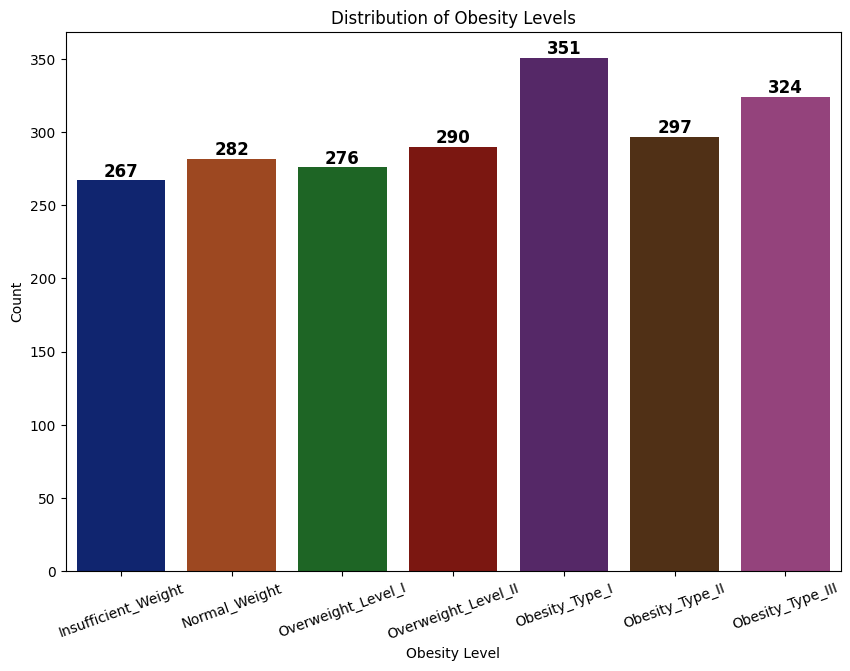

In [10]:
ordered_labels = [
    'Insufficient_Weight', 
    'Normal_Weight', 
    'Overweight_Level_I', 
    'Overweight_Level_II', 
    'Obesity_Type_I', 
    'Obesity_Type_II', 
    'Obesity_Type_III'
]


plt.figure(figsize=(10, 7))
ax = sns.countplot(data=df, x='NObeyesdad', palette='dark', order=ordered_labels)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')


plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=20)
plt.ylabel('Count')
plt.xlabel('Obesity Level')
plt.savefig('obesity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
df['NObeyesdad'].value_counts()


Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: NObeyesdad, dtype: int64

<h2 style="color: darkgreen; text-align: center;">Find Outliers</h2>

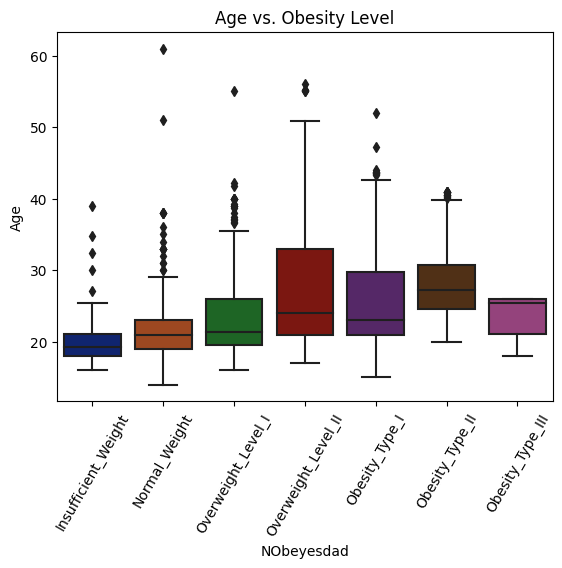

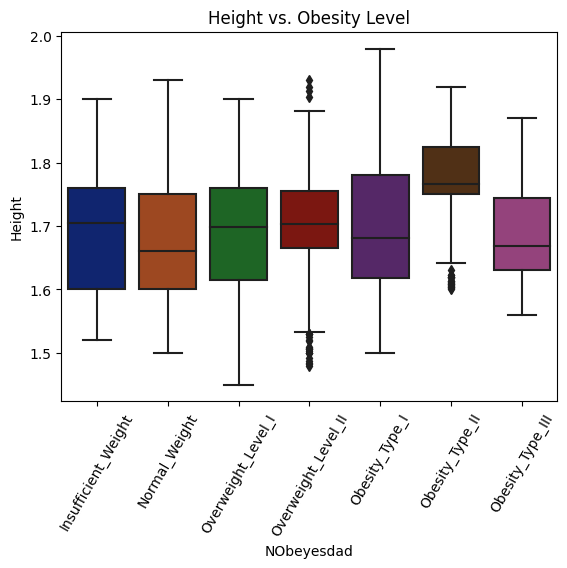

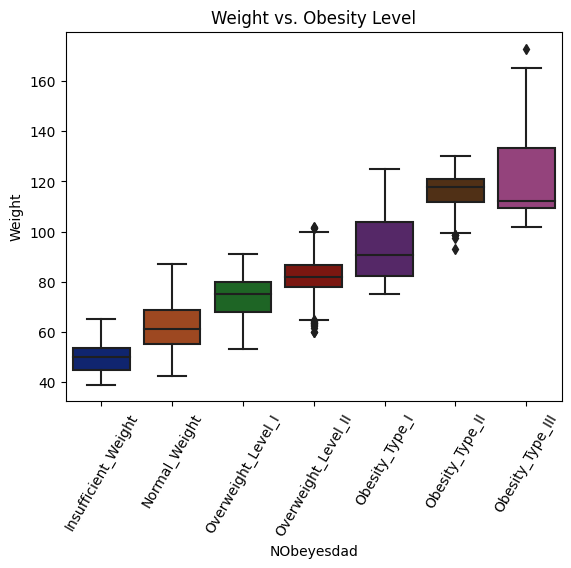

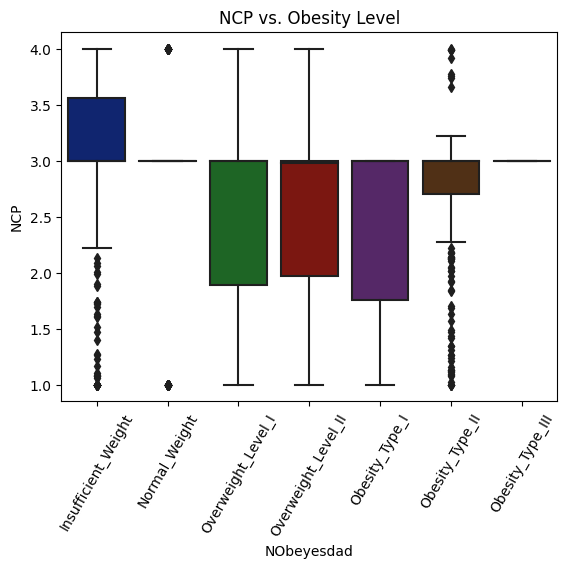

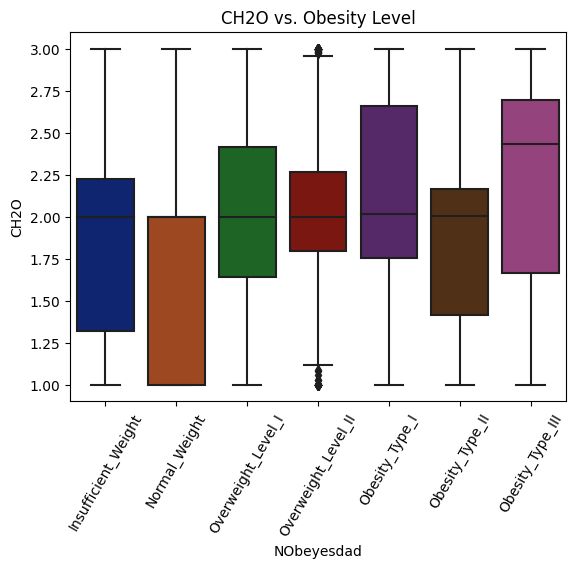

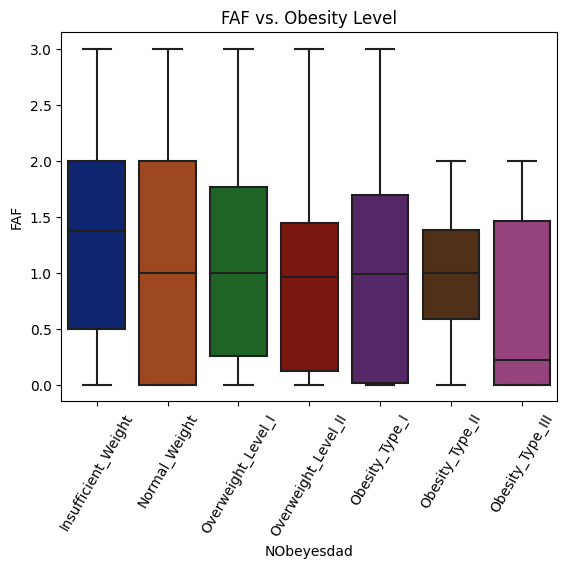

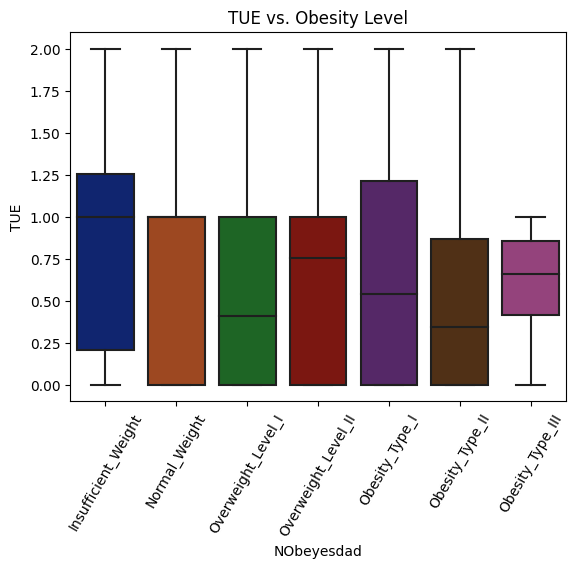

In [12]:
numerical_features = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']
ordered_labels = [
    'Insufficient_Weight', 
    'Normal_Weight', 
    'Overweight_Level_I', 
    'Overweight_Level_II', 
    'Obesity_Type_I', 
    'Obesity_Type_II', 
    'Obesity_Type_III'
]

for feature in numerical_features:
    plt.figure()
    sns.boxplot(
        data=df, 
        x='NObeyesdad', 
        y=feature, 
        palette='dark', 
        order=ordered_labels  
    )
    plt.title(f'{feature} vs. Obesity Level')
    plt.xticks(rotation=60)
    plt.show()


<h2 style="color: green; text-align: center;">Impact of Family History on Obesity Levels</h2>


<Figure size 1000x600 with 0 Axes>

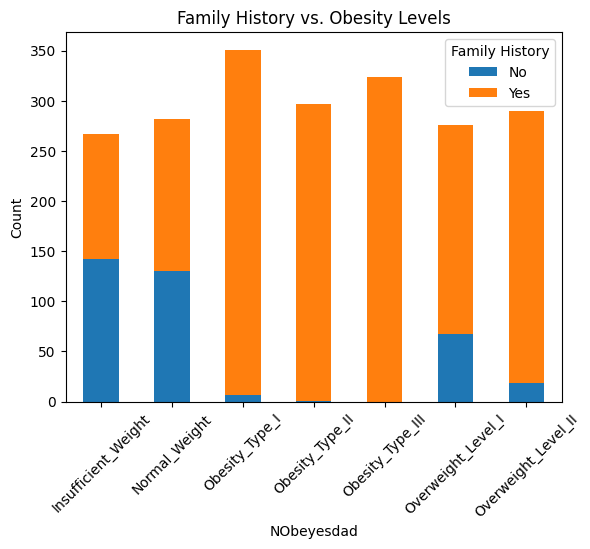

In [13]:
family_counts = df.groupby('NObeyesdad')['family_history_with_overweight'].value_counts().unstack()


plt.figure(figsize=(10, 6))
family_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])


plt.title("Family History vs. Obesity Levels")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Family History", labels=["No", "Yes"])
plt.show()


<h2 style="color: green; text-align: center;">Influence of Eating Between Meals on Obesity Levels</h2>


CAEC                 Always  Frequently  Sometimes    no
NObeyesdad                                              
Insufficient_Weight     2.0       117.0      145.0   3.0
Normal_Weight          35.0        81.0      156.0  10.0
Obesity_Type_I          6.0         6.0      338.0   1.0
Obesity_Type_II         2.0         1.0      293.0   1.0
Obesity_Type_III        NaN         1.0      323.0   NaN
Overweight_Level_I      5.0        14.0      236.0  21.0
Overweight_Level_II     3.0        16.0      270.0   1.0


<Figure size 1000x600 with 0 Axes>

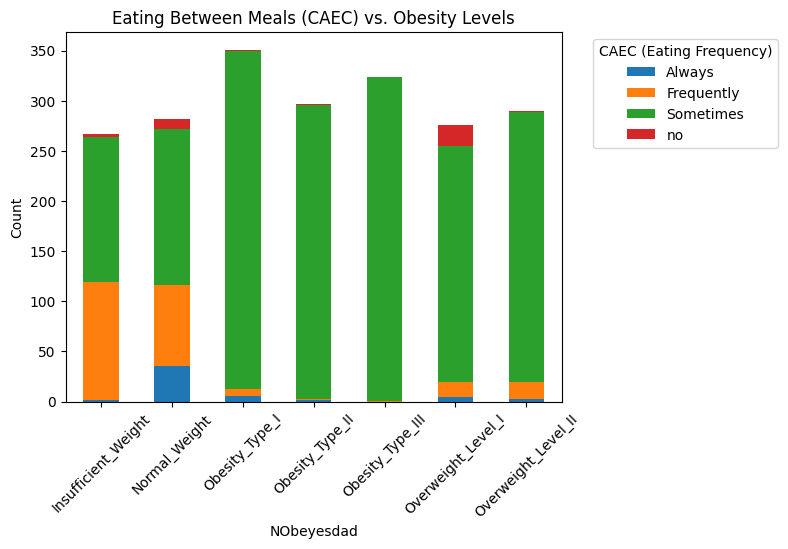

In [14]:
caec_counts = df.groupby('NObeyesdad')['CAEC'].value_counts().unstack()


print(caec_counts)


plt.figure(figsize=(10,6))
caec_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])


plt.title("Eating Between Meals (CAEC) vs. Obesity Levels")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="CAEC (Eating Frequency)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<h2 style="color: green; text-align: center;">Gender Distribution Across Obesity Levels</h2>


Gender               Female  Male
NObeyesdad                       
Insufficient_Weight     169    98
Normal_Weight           137   145
Obesity_Type_I          156   195
Obesity_Type_II           2   295
Obesity_Type_III        323     1
Overweight_Level_I      145   131
Overweight_Level_II     103   187


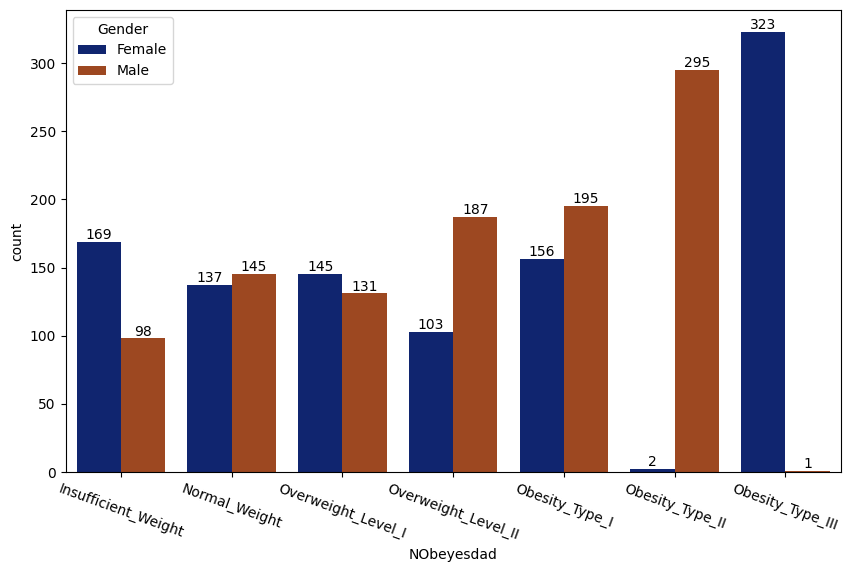

In [15]:
gender_counts = df.groupby('NObeyesdad')['Gender'].value_counts().unstack()
print(gender_counts)
plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=df, 
    x="NObeyesdad", 
    hue="Gender", 
    palette='dark', 
    order=[
        'Insufficient_Weight', 
        'Normal_Weight', 
        'Overweight_Level_I', 
        'Overweight_Level_II', 
        'Obesity_Type_I', 
        'Obesity_Type_II', 
        'Obesity_Type_III'
    ]  
)
plt.xticks(rotation=-20)


for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.show()


<h2 style="color: darkgreen; text-align: center;">How do Age and Weight relate to each other?</h2>

Statistics for Normal Weight:
              Age      Weight
count  282.000000  282.000000
mean    21.758865   62.164894
std      5.121861    9.322659
min     14.000000   42.300000
25%     19.000000   55.075000
50%     21.000000   61.000000
75%     23.000000   68.750000
max     61.000000   87.000000

--------------------------------------------------

Statistics for Overweight Level II:
              Age      Weight
count  290.000000  290.000000
mean    26.996981   82.085271
std      8.061061    8.450932
min     17.000000   60.000000
25%     21.000321   78.029553
50%     24.000000   82.000000
75%     33.000000   86.850322
max     56.000000  102.000000

--------------------------------------------------

Statistics for Obesity Type III:
              Age      Weight
count  324.000000  324.000000
mean    23.495554  120.941114
std      2.764324   15.532225
min     18.000000  102.000000
25%     21.020867  109.491834
50%     25.369387  112.049308
75%     26.000000  133.502780
max     26.0000

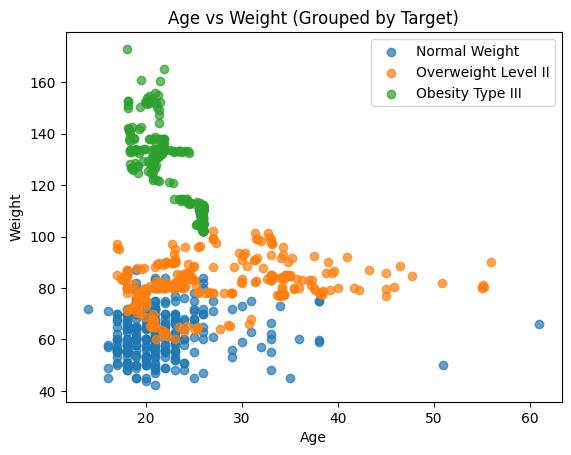

In [16]:
for target in ['Normal_Weight', 'Overweight_Level_II', 'Obesity_Type_III']:
    subset = df[df['NObeyesdad'] == target]
    print(f"Statistics for {target.replace('_', ' ')}:")
    print(subset[['Age', 'Weight']].describe())
    print("\n" + "-"*50 + "\n")


# plot
for target in ['Normal_Weight', 'Overweight_Level_II', 'Obesity_Type_III']:  
    subset = df[df['NObeyesdad'] == target]
    plt.scatter(subset['Age'], subset['Weight'], label=target.replace('_', ' '), alpha=0.7) 
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Age vs Weight (Grouped by Target)')
plt.legend()
plt.show()


<h2 style="color: darkgreen; text-align: center;">Does family history with overweight affect obesity type?</h2>

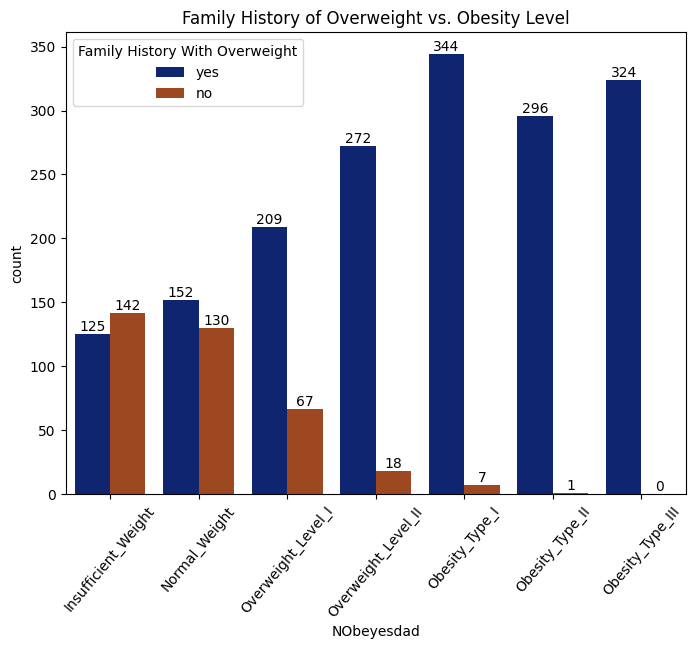

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=df, 
    hue='family_history_with_overweight', 
    x='NObeyesdad', 
    palette='dark', 
    order=[
        'Insufficient_Weight', 
        'Normal_Weight', 
        'Overweight_Level_I', 
        'Overweight_Level_II', 
        'Obesity_Type_I', 
        'Obesity_Type_II', 
        'Obesity_Type_III'
    ]  
)
plt.title('Family History of Overweight vs. Obesity Level')
plt.xticks(rotation=50)


legend = ax.legend(title='Family History With Overweight')  


for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.show()


<h2 style="color: darkgreen; text-align: center;">Does eating food between meals affect obesity type?</h2>

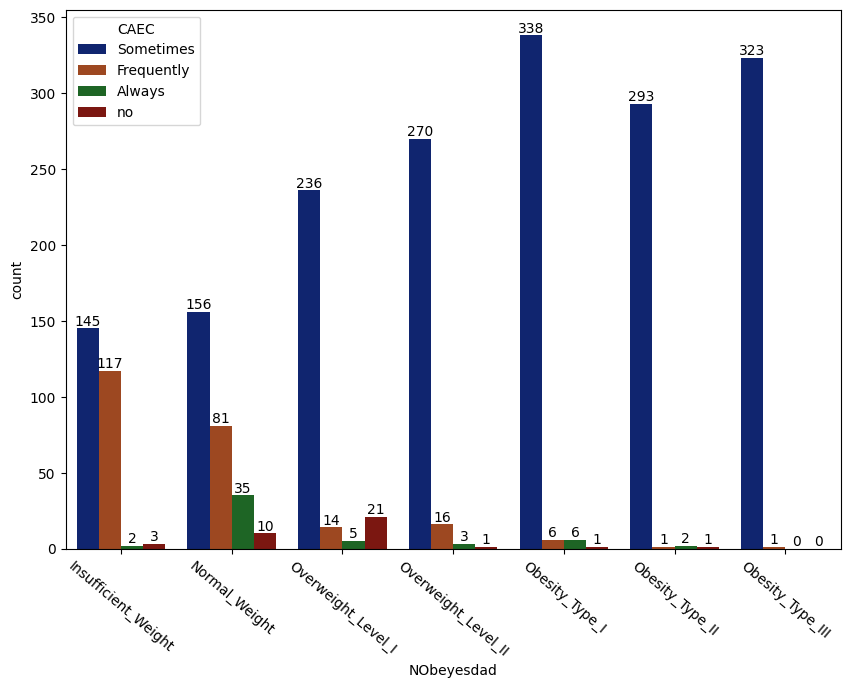

In [18]:
plt.figure(figsize=(10,7))
ax = sns.countplot(
    data=df, 
    x="NObeyesdad", 
    hue="CAEC", 
    palette=sns.color_palette("dark"),
    order=[
        'Insufficient_Weight', 
        'Normal_Weight', 
        'Overweight_Level_I', 
        'Overweight_Level_II', 
        'Obesity_Type_I', 
        'Obesity_Type_II', 
        'Obesity_Type_III'
    ]  
)
plt.xticks(rotation=-40)


for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.show()


<h2 style="color: darkgreen; text-align: center;">Does alcohol consumption influence the type of obesity?</h2>

CALC                 Always  Frequently  Sometimes     no
NObeyesdad                                               
Insufficient_Weight     NaN         1.0      149.0  117.0
Normal_Weight           1.0        18.0      159.0  104.0
Obesity_Type_I          NaN        14.0      172.0  165.0
Obesity_Type_II         NaN         2.0      224.0   71.0
Obesity_Type_III        NaN         NaN      323.0    1.0
Overweight_Level_I      NaN        16.0      210.0   50.0
Overweight_Level_II     NaN        19.0      143.0  128.0


<Figure size 1000x600 with 0 Axes>

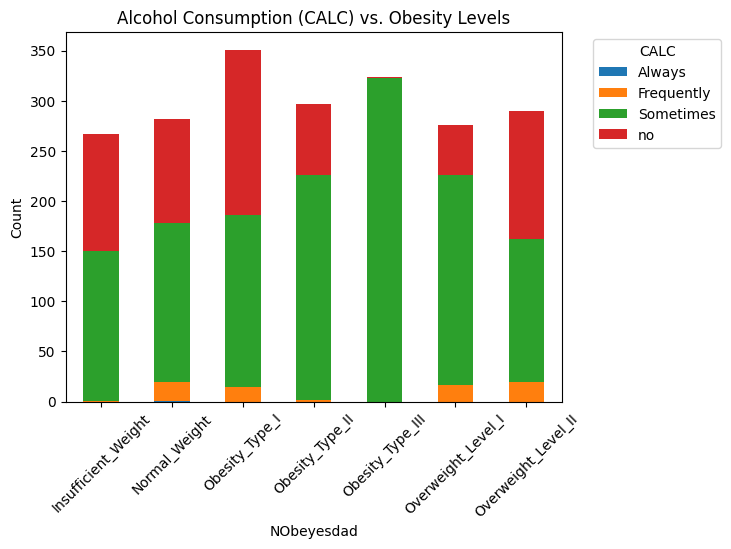

In [19]:
calc_counts = df.groupby('NObeyesdad')['CALC'].value_counts().unstack()


print(calc_counts)


plt.figure(figsize=(10,6))
calc_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])


plt.title("Alcohol Consumption (CALC) vs. Obesity Levels")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="CALC", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<h2 style="color: darkgreen; text-align: center;">Does the mode of transportation have an impact on obesity type</h2>

MTRANS               Automobile  Bike  Motorbike  Public_Transportation  \
NObeyesdad                                                                
Insufficient_Weight        46.0   NaN        NaN                  215.0   
Normal_Weight              44.0   4.0        6.0                  197.0   
Obesity_Type_I            110.0   NaN        3.0                  236.0   
Obesity_Type_II            95.0   1.0        NaN                  200.0   
Obesity_Type_III            1.0   NaN        NaN                  323.0   
Overweight_Level_I         66.0   2.0        1.0                  198.0   
Overweight_Level_II        94.0   NaN        1.0                  189.0   

MTRANS               Walking  
NObeyesdad                    
Insufficient_Weight      6.0  
Normal_Weight           31.0  
Obesity_Type_I           2.0  
Obesity_Type_II          1.0  
Obesity_Type_III         NaN  
Overweight_Level_I       9.0  
Overweight_Level_II      6.0  


<Figure size 1000x600 with 0 Axes>

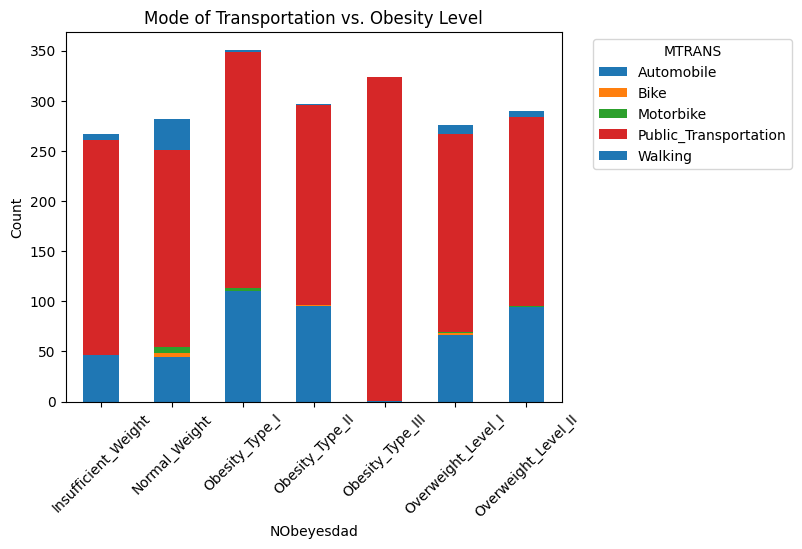

In [20]:
MTRANS_counts = df.groupby('NObeyesdad')['MTRANS'].value_counts().unstack()


print(MTRANS_counts)


plt.figure(figsize=(10,6))
MTRANS_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])


plt.title("Mode of Transportation vs. Obesity Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="MTRANS", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


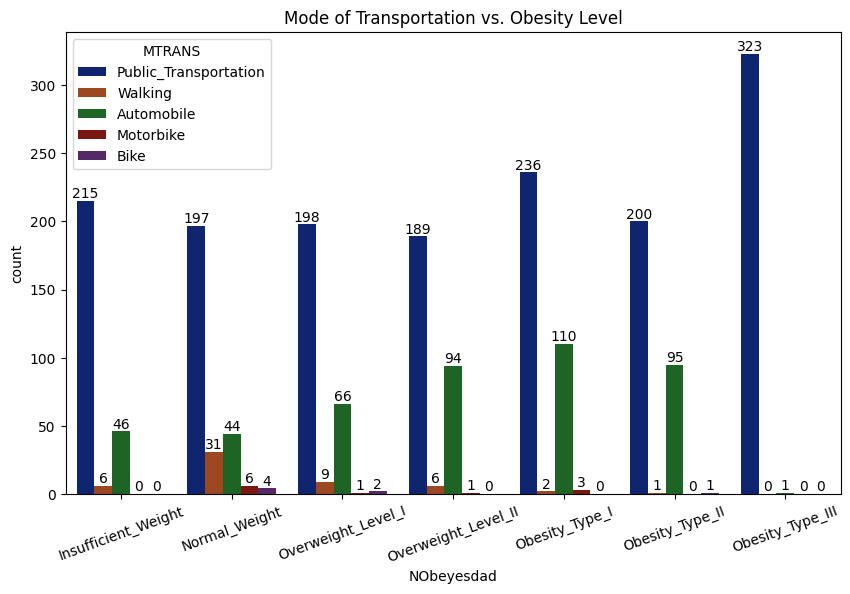

In [21]:
plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=df, 
    x="NObeyesdad", 
    hue="MTRANS", 
    palette=sns.color_palette("dark"), 
    order=[
        'Insufficient_Weight', 
        'Normal_Weight', 
        'Overweight_Level_I', 
        'Overweight_Level_II', 
        'Obesity_Type_I', 
        'Obesity_Type_II', 
        'Obesity_Type_III'
    ]
)
plt.title('Mode of Transportation vs. Obesity Level')
plt.xticks(rotation=20)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.show()


<h2 style="color: darkgreen; text-align: center;">Does frequent consumption of high-calorie food contribute to obesity type?</h2>

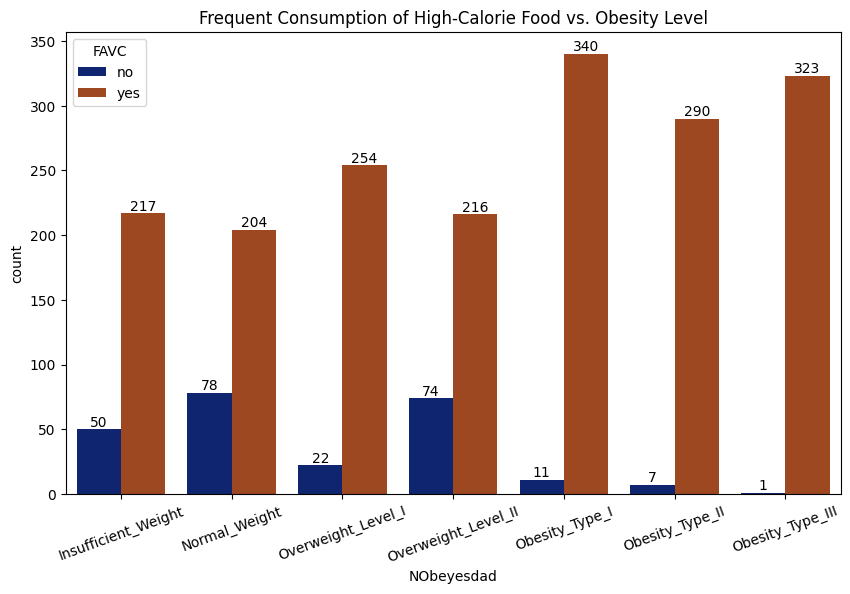

In [22]:
plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=df, 
    x="NObeyesdad", 
    hue="FAVC", 
    palette=sns.color_palette("dark"),  
    order=[
        'Insufficient_Weight', 
        'Normal_Weight', 
        'Overweight_Level_I', 
        'Overweight_Level_II', 
        'Obesity_Type_I', 
        'Obesity_Type_II', 
        'Obesity_Type_III'
    ]  
)
plt.title('Frequent Consumption of High-Calorie Food vs. Obesity Level')
plt.xticks(rotation=20)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.show()


<h2 style="color: green; text-align: center;">Impact of High-Calorie Food Consumption on Obesity Levels</h2>


FAVC                 no  yes
NObeyesdad                  
Insufficient_Weight  50  217
Normal_Weight        78  204
Obesity_Type_I       11  340
Obesity_Type_II       7  290
Obesity_Type_III      1  323
Overweight_Level_I   22  254
Overweight_Level_II  74  216


<Figure size 1000x600 with 0 Axes>

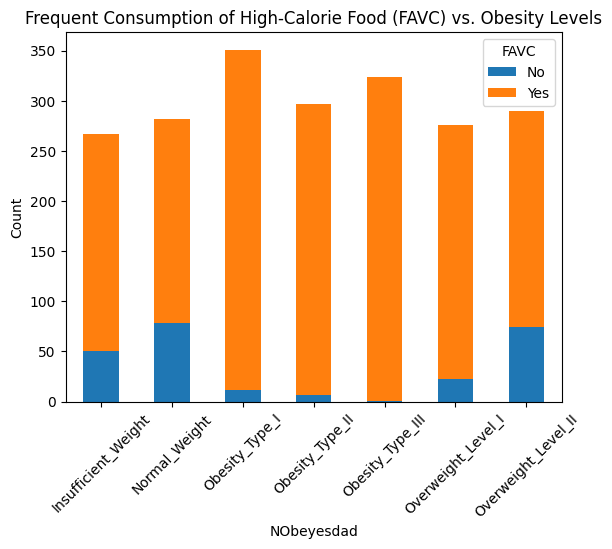

In [23]:
favc_counts = df.groupby('NObeyesdad')['FAVC'].value_counts().unstack()


print(favc_counts)


plt.figure(figsize=(10,6))
favc_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])


plt.title("Frequent Consumption of High-Calorie Food (FAVC) vs. Obesity Levels")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="FAVC", labels=["No", "Yes"])
plt.show()


<h2 style="color: darkgreen; text-align: center;">Feature Engineering</h2>

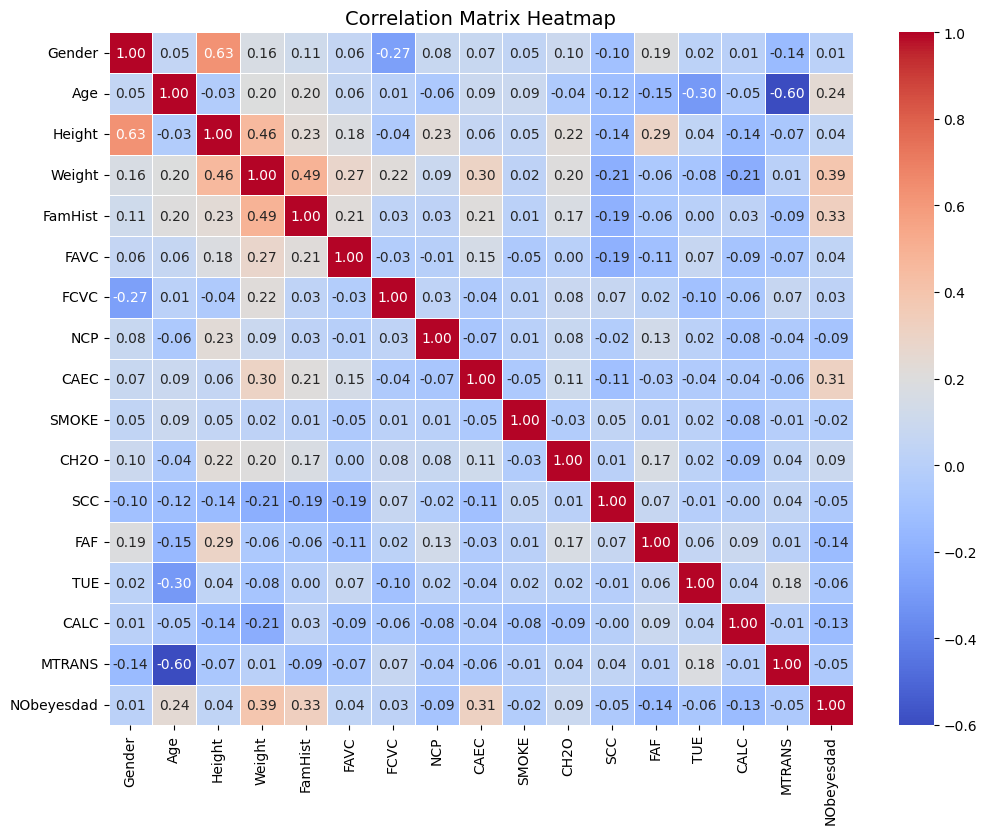

In [24]:
lbl = LabelEncoder()
categorical_columns = ['Gender', 'SMOKE', 'family_history_with_overweight', 'CALC', 'FAVC', 'SCC', 'CAEC', 'MTRANS', 'NObeyesdad']


df_encoded = df.copy()

for col in categorical_columns:
    df_encoded[col] = lbl.fit_transform(df_encoded[col])


df_encoded.rename(columns={'family_history_with_overweight': 'FamHist'}, inplace=True)


corr_matrix = df_encoded.corr()

# heatmap
plt.figure(figsize=(12, 9)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True, annot_kws={"size":10})
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.show()


In [25]:
df_encoded.corr()['NObeyesdad'].sort_values(ascending=False)


NObeyesdad    1.000000
Weight        0.388802
FamHist       0.330391
CAEC          0.314510
Age           0.238308
CH2O          0.092616
FAVC          0.041023
Height        0.038700
FCVC          0.025728
Gender        0.014699
SMOKE        -0.023341
MTRANS       -0.047784
SCC          -0.050936
TUE          -0.064876
NCP          -0.088235
CALC         -0.132821
FAF          -0.135192
Name: NObeyesdad, dtype: float64

### Features with Stronger Positive Correlations:
- **Weight (0.388802):** This has the strongest positive correlation with obesity levels, suggesting heavier weight is closely associated with higher obesity levels.
- **Family History With Overweight (0.330391):** Indicates that having a family history of being overweight is significantly tied to obesity levels.
- **CAEC (0.314510):** Eating habits, specifically frequency of calorie consumption (possibly emotional eating), also show a notable link.

### Features with Moderate Positive Correlations:
- **Age (0.238308):** Older age is modestly associated with obesity levels.
- **CH2O (0.092616):** Indicates hydration frequency has a weak positive association.

### Features with Minimal or Negative Correlations:
- **CALC (-0.132821):** Alcohol consumption frequency has a mild negative relationship with obesity levels.
- **FAF (-0.135192):** Physical activity frequency shows a weak negative correlation, potentially hinting that higher activity is slightly protective against obesity.
- **MTRANS (-0.047784):** Mode of transportation, such as walking or biking, seems to have an almost negligible negative effect.

From this data, it seems lifestyle factors (e.g., **Weight**, **Family History**, **CAEC**) play a larger role, while physical activity, transportation, and alcohol consumption contribute less prominently.


In [26]:
lbl = LabelEncoder()
for col in categorical_columns:
    df[col] = lbl.fit_transform(df[col])

In [27]:
y=df['NObeyesdad']
X = df.drop(['NObeyesdad'], axis=1)

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, shuffle=True)

<h2 style="color: darkgreen; text-align: center;">Logistic Regression</h2>

<p style="text-align: justify; font-size: 16px;">
    <strong>Logistic Regression</strong> is a widely used classification algorithm that models the probability of an instance belonging to a specific class using the logistic function. It is particularly useful for binary classification tasks but can also be extended to multi-class problems.
</p>

<p style="text-align: justify; font-size: 16px;">
    In this study, we use the <code>elasticnet</code> penalty, which combines L1 (Lasso) and L2 (Ridge) regularization, helping to prevent overfitting while ensuring feature selection. The <code>saga</code> solver is chosen as it is efficient for large datasets and supports ElasticNet regularization.
</p>

<p style="text-align: justify; font-size: 16px;">
    To assess generalization, we apply <strong>K-Fold Cross Validation</strong> (with <strong>5 folds</strong>), ensuring that the model is evaluated across different training splits. This methodology provides a stable estimate of the model’s accuracy and robustness.
</p>


In [30]:
logreg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)

#  K-Fold CV (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg, X_train, y_train, cv=kf)

print(f"K-Fold CV Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

# train
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)


train_score = logreg.score(X_train, y_train) * 100
test_score = logreg.score(X_test, y_test) * 100

metrics = {
    "Test Score (%)": f"{test_score:.2f}",
    "Train Score (%)": f"{train_score:.2f}",
    "Confusion Matrix": confusion_matrix(y_test, y_pred),
    "Accuracy Score": f"{accuracy_score(y_test, y_pred) * 100:.2f}",
    "Zero-One Loss": zero_one_loss(y_test, y_pred, normalize=False),
    "F1 Score (%)": f"{f1_score(y_test, y_pred, average='micro') * 100:.2f}",
    "Recall Score (%)": f"{recall_score(y_test, y_pred, average='weighted') * 100:.2f}",
    "Precision Score (%)": f"{precision_score(y_test, y_pred, average='micro') * 100:.2f}",
    "Classification Report\n": classification_report(y_test, y_pred)
}


print("\nModel Evaluation Results:\n" + "-"*30)
for metric, value in metrics.items():
    print(f"{metric: <20}: {value}")


K-Fold CV Scores: [0.86900958 0.85623003 0.88498403 0.87859425 0.88498403]
Mean CV Accuracy: 0.87

Model Evaluation Results:
------------------------------
Test Score (%)      : 87.36
Train Score (%)     : 91.05
Confusion Matrix    : [[71  3  0  0  0  0  0]
 [13 51  0  0  0 12  0]
 [ 0  0 77  3  1  0  4]
 [ 0  0  0 82  0  0  0]
 [ 0  0  0  0 77  0  0]
 [ 0  3  0  0  0 54 14]
 [ 0  0  6  0  0  7 44]]
Accuracy Score      : 87.36
Zero-One Loss       : 66.0
F1 Score (%)        : 87.36
Recall Score (%)    : 87.36
Precision Score (%) : 87.36
Classification Report
:               precision    recall  f1-score   support

           0       0.85      0.96      0.90        74
           1       0.89      0.67      0.77        76
           2       0.93      0.91      0.92        85
           3       0.96      1.00      0.98        82
           4       0.99      1.00      0.99        77
           5       0.74      0.76      0.75        71
           6       0.71      0.77      0.74        57



<h2 style="color: darkgreen; text-align: center;">Decision Tree Classification</h2>

<p style="text-align: justify; font-size: 16px;">
    <strong>Decision Tree</strong> is a widely used classification algorithm that partitions data recursively based on feature values to 
    maximize information gain. Each node represents a decision point, allowing the model to learn hierarchical rules for classification.
</p>

<p style="text-align: justify; font-size: 16px;">
    In this study, we use <strong>GridSearchCV</strong> to optimize key hyperparameters such as <code>max_depth</code>, <code>criterion</code>, 
    <code>min_samples_split</code>, and <code>ccp_alpha</code>. The model is tuned to balance depth for accurate classification while preventing overfitting.
</p>

<p style="text-align: justify; font-size: 16px;">
    To validate performance and generalization, we apply <strong>K-Fold Cross Validation</strong> with <strong>5 folds</strong>. 
    This ensures that the model’s accuracy is tested across multiple splits, reducing variability and improving robustness in real-world applications.
</p>


In [ ]:
param_grid = {
    'max_depth': [4, 6, 8, 10],  
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [10, 20, 30],  
    'ccp_alpha': [0.0001, 0.001, 0.005, 0.01, 0.02]  
}


dt = DecisionTreeClassifier(random_state=125)
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, n_jobs=1)
grid_search_dt.fit(X_train, y_train)


print(f"Best parameters found for Decision Tree: {grid_search_dt.best_params_}")


dt_optimized = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=125)
dt_optimized.fit(X_train, y_train)


y_pred_dt = dt_optimized.predict(X_test)


train_score_dt = dt_optimized.score(X_train, y_train) * 100
test_score_dt = dt_optimized.score(X_test, y_test) * 100

metrics_dt = {
    "Test Score (%)": f"{test_score_dt:.2f}",
    "Train Score (%)": f"{train_score_dt:.2f}",
    "Confusion Matrix": confusion_matrix(y_test, y_pred_dt),
    "Accuracy Score": f"{accuracy_score(y_test, y_pred_dt) * 100:.2f}",
    "Zero-One Loss": zero_one_loss(y_test, y_pred_dt, normalize=False),
    "F1 Score (%)": f"{f1_score(y_test, y_pred_dt, average='micro') * 100:.2f}",
    "Recall Score (%)": f"{recall_score(y_test, y_pred_dt, average='weighted') * 100:.2f}",
    "Precision Score (%)": f"{precision_score(y_test, y_pred_dt, average='micro') * 100:.2f}",
    "Classification Report\n": classification_report(y_test, y_pred_dt)
}


print("\nDecision Tree - Model Evaluation Results:\n" + "-"*40)
for metric, value in metrics_dt.items():
    print(f"{metric: <20}: {value}")


kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt_optimized, X_train, y_train, cv=kf)

print(f"K-Fold CV Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")


Migliori parametri trovati per Decision Tree: {'ccp_alpha': 0.0001, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}

Decision Tree - Model Evaluation Results:
----------------------------------------
Test Score (%)      : 93.68
Train Score (%)     : 98.79
Confusion Matrix    : [[68  6  0  0  0  0  0]
 [ 3 61  0  0  0 12  0]
 [ 0  0 84  0  0  0  1]
 [ 0  0  4 78  0  0  0]
 [ 0  0  0  0 77  0  0]
 [ 0  3  0  0  0 66  2]
 [ 0  0  0  0  0  2 55]]
Accuracy Score      : 93.68
Zero-One Loss       : 33.0
F1 Score (%)        : 93.68
Recall Score (%)    : 93.68
Precision Score (%) : 93.68
Classification Report
:               precision    recall  f1-score   support

           0       0.96      0.92      0.94        74
           1       0.87      0.80      0.84        76
           2       0.95      0.99      0.97        85
           3       1.00      0.95      0.97        82
           4       1.00      1.00      1.00        77
           5       0.82      0.93      0.87    

<h2 style="color: darkgreen; text-align: center;">Random Forest Classification</h2>

<p style="text-align: justify; font-size: 16px;">
    <strong>Random Forest</strong> is an ensemble learning method that builds multiple decision trees and aggregates their predictions 
    to enhance accuracy and reduce variance. By using multiple trees, the model mitigates overfitting and generalizes well to unseen data.
</p>

<p style="text-align: justify; font-size: 16px;">
    In this study, the model is trained with <strong>400 estimators</strong>, using the <code>entropy</code> criterion for splitting decisions. 
    The maximum depth is set to <strong>8</strong> to balance complexity and generalization, while a minimum of <strong>30 samples</strong> is required 
    for a split to prevent excessive branching.
</p>

<p style="text-align: justify; font-size: 16px;">
    To assess generalization performance, we apply <strong>K-Fold Cross Validation</strong> with <strong>5 folds</strong>. This method ensures 
    that each subset of data is used for both training and validation, helping to evaluate the model’s robustness across different splits.
</p>


In [32]:
rf = RandomForestClassifier(n_estimators=400, criterion='entropy', random_state=42, max_depth=8, min_samples_split=30)

# K-Fold CV (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=kf)

print(f"K-Fold CV Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")


rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

train_score = rf.score(X_train, y_train) * 100
test_score = rf.score(X_test, y_test) * 100

metrics = {
    "Test Score (%)": f"{test_score:.2f}",
    "Train Score (%)": f"{train_score:.2f}",
    "Confusion Matrix": confusion_matrix(y_test, y_pred),
    "Accuracy Score": f"{accuracy_score(y_test, y_pred) * 100:.2f}",
    "Zero-One Loss": zero_one_loss(y_test, y_pred, normalize=False),
    "F1 Score (%)": f"{f1_score(y_test, y_pred, average='micro') * 100:.2f}",
    "Recall Score (%)": f"{recall_score(y_test, y_pred, average='weighted') * 100:.2f}",
    "Precision Score (%)": f"{precision_score(y_test, y_pred, average='micro') * 100:.2f}",
    "Classification Report\n": classification_report(y_test, y_pred)
}


print("\nModel Evaluation Results:\n" + "-"*30)
for metric, value in metrics.items():
    print(f"{metric: <20}: {value}")


K-Fold CV Scores: [0.90415335 0.91693291 0.92651757 0.89456869 0.90095847]
Mean CV Accuracy: 0.91

Model Evaluation Results:
------------------------------
Test Score (%)      : 91.95
Train Score (%)     : 96.10
Confusion Matrix    : [[70  4  0  0  0  0  0]
 [ 7 63  0  0  0  5  1]
 [ 0  1 79  0  0  0  5]
 [ 0  0  0 82  0  0  0]
 [ 0  0  0  0 77  0  0]
 [ 0  6  0  0  0 60  5]
 [ 0  3  4  0  0  1 49]]
Accuracy Score      : 91.95
Zero-One Loss       : 42.0
F1 Score (%)        : 91.95
Recall Score (%)    : 91.95
Precision Score (%) : 91.95
Classification Report
:               precision    recall  f1-score   support

           0       0.91      0.95      0.93        74
           1       0.82      0.83      0.82        76
           2       0.95      0.93      0.94        85
           3       1.00      1.00      1.00        82
           4       1.00      1.00      1.00        77
           5       0.91      0.85      0.88        71
           6       0.82      0.86      0.84        57



<h2 style="color: darkgreen; text-align: center;">Support Vector Machine</h2>

<p style="text-align: justify; font-size: 16px;">
    <strong>Support Vector Machine (SVM)</strong> is a powerful supervised learning algorithm used for classification tasks. 
    It works by finding the optimal hyperplane that maximizes the margin between different classes, ensuring high generalization capability. 
    The kernel trick allows SVM to handle non-linearly separable data by mapping it into higher-dimensional spaces.
</p>

<p style="text-align: justify; font-size: 16px;">
    To improve performance, we use <strong>GridSearchCV</strong> to optimize key hyperparameters such as <code>C</code> (regularization parameter), 
    <code>kernel</code> (which determines the feature mapping strategy), and <code>gamma</code> (which controls the influence of individual training samples).
</p>

<p style="text-align: justify; font-size: 16px;">
    We implement <strong>K-Fold Cross Validation</strong> (with 5 folds) to assess model stability across different training splits. 
    This method ensures that the selected hyperparameters generalize well to unseen data, reducing the risk of overfitting while maintaining high accuracy.
</p>


In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 3, 5],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


svc = SVC(random_state=42)
grid_search_svm = GridSearchCV(svc, param_grid_svm, cv=5, n_jobs=1)
grid_search_svm.fit(X_train, y_train)


print(f"Best parameters found for SVM: {grid_search_svm.best_params_}")


svc_optimized = SVC(**grid_search_svm.best_params_, random_state=42)
svc_optimized.fit(X_train, y_train)

y_pred_svm = svc_optimized.predict(X_test)

train_score_svm = svc_optimized.score(X_train, y_train) * 100
test_score_svm = svc_optimized.score(X_test, y_test) * 100

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_final = cross_val_score(svc_optimized, X_train, y_train, cv=kf)

print(f"K-Fold CV Scores of the final model: {cv_scores_final}")
print(f"Final Mean CV Accuracy: {cv_scores_final.mean():.2f}")


metrics_svm = {
    "Test Score (%)": f"{test_score_svm:.2f}",
    "Train Score (%)": f"{train_score_svm:.2f}",
    "Confusion Matrix": confusion_matrix(y_test, y_pred_svm),
    "Accuracy Score": f"{accuracy_score(y_test, y_pred_svm) * 100:.2f}",
    "Zero-One Loss": zero_one_loss(y_test, y_pred_svm, normalize=False),
    "F1 Score (%)": f"{f1_score(y_test, y_pred_svm, average='micro') * 100:.2f}",
    "Recall Score (%)": f"{recall_score(y_test, y_pred_svm, average='weighted') * 100:.2f}",
    "Precision Score (%)": f"{precision_score(y_test, y_pred_svm, average='micro') * 100:.2f}",
    "Classification Report\n": classification_report(y_test, y_pred_svm)
}

print("\nSVM - Model Evaluation Results:\n" + "-"*40)
for metric, value in metrics_svm.items():
    print(f"{metric: <20}: {value}")


Migliori parametri trovati per SVM: {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}
K-Fold CV Scores del modello finale: [0.96166134 0.96166134 0.95527157 0.9456869  0.94249201]
Mean CV Accuracy finale: 0.95

SVM - Model Evaluation Results:
----------------------------------------
Test Score (%)      : 96.74
Train Score (%)     : 97.76
Confusion Matrix    : [[72  2  0  0  0  0  0]
 [ 2 73  0  0  0  1  0]
 [ 0  0 83  1  0  0  1]
 [ 0  0  0 82  0  0  0]
 [ 0  0  0  0 77  0  0]
 [ 0  0  0  0  0 65  6]
 [ 0  0  1  0  0  3 53]]
Accuracy Score      : 96.74
Zero-One Loss       : 17.0
F1 Score (%)        : 96.74
Recall Score (%)    : 96.74
Precision Score (%) : 96.74
Classification Report
:               precision    recall  f1-score   support

           0       0.97      0.97      0.97        74
           1       0.97      0.96      0.97        76
           2       0.99      0.98      0.98        85
           3       0.99      1.00      0.99        82
           4       1.00      1.00     

<h2 style="color: darkgreen; text-align: center;">AdaBoost Classifier</h2>

<p style="text-align: justify; font-size: 16px;">
    <strong>AdaBoost (Adaptive Boosting)</strong> is an ensemble learning technique that combines multiple weak classifiers to create a strong predictive model. 
    It works by sequentially training classifiers, assigning higher weights to misclassified instances to improve performance iteratively. 
    The final model is a weighted sum of all base classifiers, ensuring better generalization and accuracy.
</p>

<p style="text-align: justify; font-size: 16px;">
    In this study, we use <strong>GridSearchCV</strong> to optimize the key hyperparameters of AdaBoost: 
    the number of estimators and the learning rate. A <strong>Decision Tree</strong> (depth-limited) is chosen as the base estimator 
    to prevent overfitting while maintaining strong decision-making capabilities.
</p>

<p style="text-align: justify; font-size: 16px;">
    To ensure robustness, we apply <strong>K-Fold Cross Validation</strong> (with 5 folds), which helps evaluate the model’s stability 
    across different training-test splits. Additionally, we use <strong>SMOTE</strong> for data balancing, ensuring that 
    minority classes are properly represented in training to avoid bias in predictions.
</p>


In [35]:
pca = PCA(n_components=0.95)  
X = pca.fit_transform(X)




smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


base_estimator = DecisionTreeClassifier(min_samples_split=10,max_leaf_nodes=10,  max_depth=4, class_weight='balanced', random_state=42)


param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.4, 0.5, 0.6]  
}


adaboost = AdaBoostClassifier(estimator=base_estimator)
grid_search = GridSearchCV(adaboost, param_grid, cv=5, n_jobs=1)
grid_search.fit(X_train_bal, y_train_bal)


print(f"Best parameters found for AdaBoost: {grid_search.best_params_}")


adaboost_optimized = AdaBoostClassifier(estimator=base_estimator, **grid_search.best_params_)
adaboost_optimized.fit(X_train_bal, y_train_bal)


kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_final = cross_val_score(adaboost_optimized, X_train_bal, y_train_bal, cv=kf)

print(f"K-Fold CV Scores of the final model: {cv_scores_final}")
print(f"Final Mean CV Accuracy:{cv_scores_final.mean():.2f}")


y_pred = adaboost_optimized.predict(X_test)


train_score = adaboost_optimized.score(X_train_bal, y_train_bal) * 100
test_score = adaboost_optimized.score(X_test, y_test) * 100

metrics = {
    "Test Score (%)": f"{test_score:.2f}",
    "Train Score (%)": f"{train_score:.2f}",
    "Confusion Matrix": confusion_matrix(y_test, y_pred),
    "Accuracy Score": f"{accuracy_score(y_test, y_pred) * 100:.2f}",
    "Zero-One Loss": zero_one_loss(y_test, y_pred, normalize=False),
    "F1 Score (%)": f"{f1_score(y_test, y_pred, average='micro') * 100:.2f}",
    "Recall Score (%)": f"{recall_score(y_test, y_pred, average='weighted') * 100:.2f}",
    "Precision Score (%)": f"{precision_score(y_test, y_pred, average='micro') * 100:.2f}",
    "Classification Report\n": classification_report(y_test, y_pred)
}

print("\nAdaBoost - Model Evaluation Results:\n" + "-"*40)
for metric, value in metrics.items():
    print(f"{metric: <20}: {value}")


Best parameters found for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 500}
K-Fold CV Scores of the final model: [0.97050938 0.95174263 0.95967742 0.96774194 0.95967742]
Final Mean CV Accuracy:0.96

AdaBoost - Model Evaluation Results:
----------------------------------------
Test Score (%)      : 95.02
Train Score (%)     : 99.89
Confusion Matrix    : [[66  8  0  0  0  0  0]
 [ 3 64  0  0  0  9  0]
 [ 0  0 84  0  0  0  1]
 [ 0  0  2 80  0  0  0]
 [ 0  0  0  0 77  0  0]
 [ 0  0  0  0  0 70  1]
 [ 0  0  0  0  0  2 55]]
Accuracy Score      : 95.02
Zero-One Loss       : 26.0
F1 Score (%)        : 95.02
Recall Score (%)    : 95.02
Precision Score (%) : 95.02
Classification Report
:               precision    recall  f1-score   support

           0       0.96      0.89      0.92        74
           1       0.89      0.84      0.86        76
           2       0.98      0.99      0.98        85
           3       1.00      0.98      0.99        82
           4       1.00      1.00     